# Критерии согласия.

Пусть дана выборка $x_1, ... , x_n$ из неизвестного закона распределения (с функцией распределения $F(u)$).

Вводится гипотеза о виде этой функции распределения:

$H_0: F(u) =? F_0(u)$ - это `0-гипотеза`

$H_1:$ `альтернативная гипотеза`

Как проверить, что гипотеза $H_0$ верна, если доступна только выборка?

Нужно найти меру расхождения между эмперической и предполагаемой функциями распределения:
$$D_n = \max_u|F_n(u, x_1,...,x_n)-F_0(u)|$$

## Критическая область
$\{(x_1,...x_n: D_n < C_\alpha)\}$ - `область принятия гипотезы`

$\{(x_1,...x_n: D_n \ge C_\alpha)\}$ - `область отвержения гипотезы`(критическая область)

## Ошибка первого рода
$\alpha = P_{H_0}(D_n \ge C_\alpha)$ - `вероятность ошибки первого рода` (уровень значимости желания)

## Достигнутый уровень значимости
`p-value`$=P_{H_0}(D_n \ge D_{n, эксперементальное})$

Берем полученное значение в качестве границы критической области и вычисляем вероятность для нее при данной $H_0$.
* Если `p-value` > $\alpha$, то $H_0$ не отвергается
* Если `p-value` < $\alpha$, то $H_0$ отвергается

Типовыми уровнями значимости $\alpha$ обычно берутся следующие значения: `10%, 5%, 2.5%, 1%, 0.5%`

## Критерий Колмагорова-Смирнова
(Для непрерывных случайных величин)

In [75]:
X = runif(100)

In [76]:
ks.test(X, punif)


	One-sample Kolmogorov-Smirnov test

data:  X
D = 0.068305, p-value = 0.7392
alternative hypothesis: two-sided


Посмотрим, что выдаст критерий, если применить его для заведомо неверного распределения. Проведем этот эксперимент на примере нормального распределения с параметрами среднего значения и дисперсии, полученными из выборки Х. 

In [78]:
mean<-mean(X)
std<-sqrt(var(X))
ks.test(X, pnorm, mean-mean, sd=std)


	One-sample Kolmogorov-Smirnov test

data:  X
D = 0.58981, p-value < 2.2e-16
alternative hypothesis: two-sided


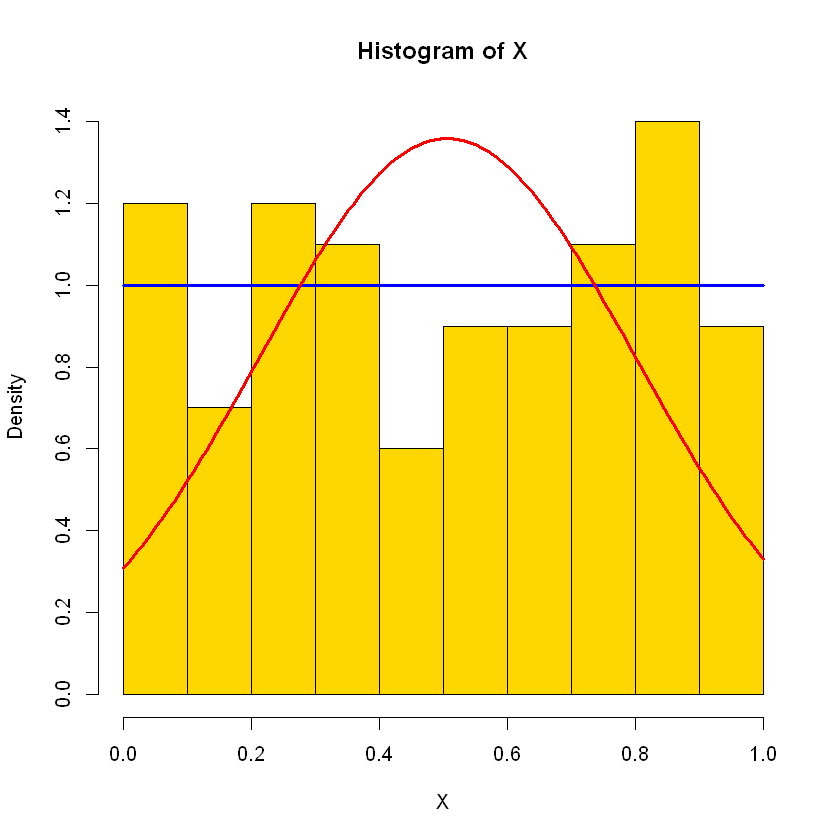

In [80]:
hist(X, pr=T, col="gold")
curve(dunif(x), add=T, col="blue", lwd=3)
curve(dnorm(x, mean, std), add=T, col="red", lwd=3)

Видно, что `p-value` для нормального распределения практически равно нулю, значит гипотеза должна быть отвергнута. 

## Пример. Правило 12 слагаемых.

Рассматривается случайная величина, определенная следующим образом:

$X = U_1+...+U_{12} - 6$,

где $U_1, ... , U_{12}$ - это независимые одинаково распрделенные случайные величины с равномерным распредлением на отрезке \[0, 1\].

Тогда на основании центральной предельной теоремы случайная величина Х распределена по нормальному закону $N(0, 1)$

Проверим данное утверждение с помощью критерия Колмогорова-Смирнова.

$H_0: X$ ~ $N(0,1)$

$H_1: X$ имеет другое распределение

In [84]:
X<-replicate(100, sum(runif(12)) - 6)

In [85]:
ks.test(X, pnorm, mean=0, sd=1)


	One-sample Kolmogorov-Smirnov test

data:  X
D = 0.079653, p-value = 0.5498
alternative hypothesis: two-sided


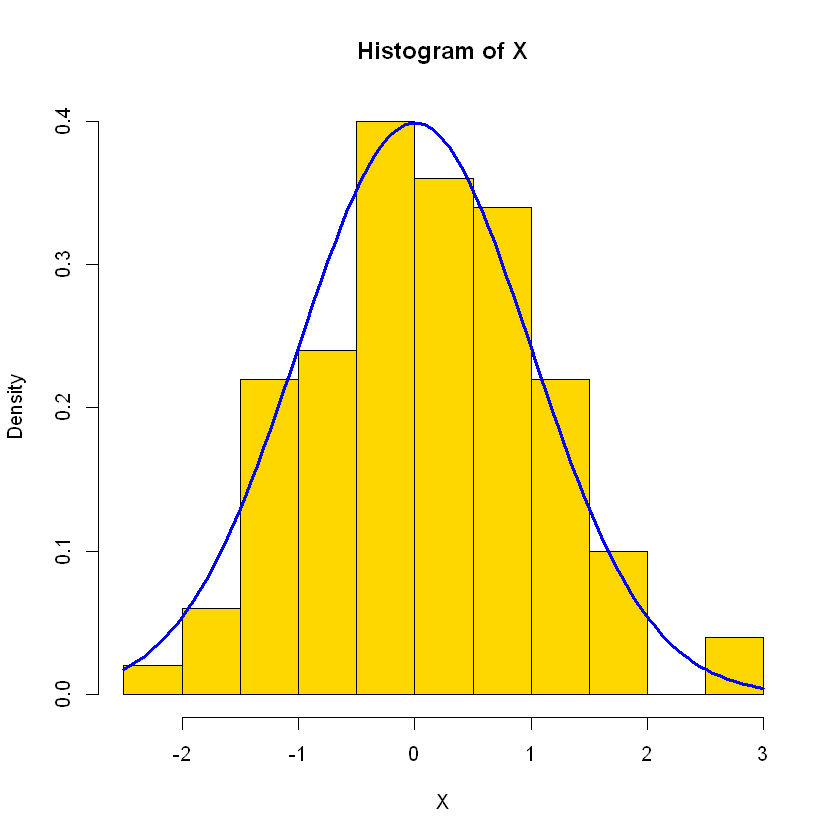

In [86]:
hist(X, pr=T, col="gold")
curve(dnorm, add=T, col="blue", lwd=3)

## Критерий согласия $\chi^2$.

Идея заключается в том, чтобы сравнивать ожидаемые от распредления частоты с наблюдаемыми частотами и вычислять на основе этого некоторую характеристику:

$R=\sum_{i=1}^{l}\frac{(n_i-p_in)^2}{np_i}$,

где $l$ - колчество различных значений, которые принимает случайная величина, $p_i$ - вероятность появления определенного значения, $n_i$ - наблюдаемое число появлений каждого из этих значений (абсолютные частоты), $n$ - число экспериментов.

Если $H_0$ `справедлива`, то R должно быть `маленьким`.

Область принятия $H_0$ - область маленьких значений R.

Область отвержения $H_0$ - область больших значений R.

## Пример. 4040 бросков монеты.

Монету подбросили 4040 раз. При этом было 2048 гербов.

Необходимо проверить, является ли монета симметричной.

In [87]:
ni<-c(2048, 4040-2048)
pi<-c(0.5, 0.5)

In [90]:
# df - degrees of freedom (степени свободы)
chisq.test(ni, p=pi)


	Chi-squared test for given probabilities

data:  ni
X-squared = 0.77624, df = 1, p-value = 0.3783


## Эксперимент Менделя.

In [91]:
ni<-c(315, 101, 108, 32)
pi<-c(9/16, 3/16, 3/16, 1/16)

In [92]:
chisq.test(ni, p=pi)


	Chi-squared test for given probabilities

data:  ni
X-squared = 0.47002, df = 3, p-value = 0.9254


## Правило 12 слагаемых с критерием $\chi^2$.

Проверим гипотезу из соответствующего примера с помощью нового критерия.

Чтобы им воспользоваться, необходимо иметь таблицу абсолютных частот для неприрывной величины, поэтому разобем все ее значения на интервалы и посчитаем для каждого интервала частоты и вероятности.

In [93]:
X<-replicate(100, sum(runif(12)) - 6)

In [98]:
ni<-table(cut(X, br=borders))
print(ni)


(-Inf,-2] (-2,-0.5]  (-0.5,0]     (0,1]     (1,3]  (3, Inf] 
        2        25        22        39        12         0 


In [99]:
pi<-diff(pnorm(borders))
print(pi)

[1] 0.022750132 0.285787407 0.191462461 0.341344746 0.157305356 0.001349898


In [100]:
chisq.test(ni, p=pi)

Warning message in chisq.test(ni, p = pi):
"Chi-squared approximation may be incorrect"


	Chi-squared test for given probabilities

data:  ni
X-squared = 2.62, df = 5, p-value = 0.7583
